# Generation of anomalies in data

The way anomalies are generated hugely varies from domain to domain, application to application. Let’s take a moment to review some of the fields where anomaly detection is extremely vital -

    1- Intrusion detection systems - In the field of computer science, unusual network traffic, abnormal user actions are common forms of intrusions. These intrusions are capable enough to breach many confidential aspects of an organization. Detection of these intrusions is a form of anomaly detection.
    2- Fraud detection in transactions - One of the most prominent use cases of anomaly detection. Nowadays, it is common to hear about events where one’s credit card number and related information get compromised. This can, in turn, lead to abnormal behavior in the usage pattern of the credit cards. Therefore, to effectively detect these frauds, anomaly detection techniques are employed.
    3- Electronic sensor events - Electronic sensors enable us to capture data from various sources. Nowadays, our mobile devices are also powered with various sensors like light sensors, accelerometer, proximity sensors, ultrasonic sensors and so on. Sensor data analysis has a lot of interesting applications. But what happens when the sensors become ineffective? This shows up in the data they capture. When a sensor becomes dysfunctional, it fails to capture the data in the correct way and thereby produces anomalies.  Sometimes, there can be abnormal changes in the data sources as well. For example, one’s pulse rate may get abnormally high due to several conditions and this leads to anomalies. This point is also very crucial considering today’s industrial scenario. We are approaching and embracing Industry 4.0 in which IoT (Internet of Things) and AI (Artificial Intelligence) are integral parts. When there is IoT, there are sensors. In fact a wide network of sensors, catering to an arsenal of real-world problems. When these sensors start to behave inconsistently the signals they convey get also uncanny, thereby causing unprecedented troubleshooting. Hence, systematic anomaly detection is a must here.

and more.

In all of the above-mentioned applications, the general idea of normal and abnormal data-points is similar. Abnormal ones are those which deviate hugely from the normal ones. These deviations are based on the assumptions that are taken while associating the data points to normal group. But then again, there are more twists to it i.e. the types of the anomalies.

    It is now safe enough to say that data generation and data capturing processes are directly related to anomalies in the data and it varies from application to application.
 
 # Anomalies can be of different types

In the data science literature, anomalies can be of the three types as follows. Understanding these types can significantly affect the way of dealing with anomalies.

    Global
    Contextual
    Collective

In the following subsections, we are to take a closer look at each of the above and discuss their key aspects like their importance, grounds where they should be paid importance to.


# Global anomalies

A key challenge in detecting global anomalies is to figure out the exact amount of deviation which leads to a potential anomaly. In fact, this is an active field of research. Follow this excellent paper by Macha et al. for more on this. Global anomalies are quite often used in the transnational auditing systems to detect fraud transactions. In this case, specifically, global anomalies are those transactions which violate the general regulations.

You might be thinking that the idea of global anomalies (deviation from the normal) may not always hold practical with respect to numerous conditions, context and similar aspects.  Yes, you are thinking just right. Anomalies can be contextual too!

![image.png](attachment:image.png![s_1185AEC62427E23657579AF288686866FF5B3F65A0E36E86D1A293C6B0CCF4B4_1553676588383_GUID-FABEA1ED-EE9D-4EE6-9417-5DEDCCFB5BC6-web.gif](attachment:s_1185AEC62427E23657579AF288686866FF5B3F65A0E36E86D1A293C6B0CCF4B4_1553676588383_GUID-FABEA1ED-EE9D-4EE6-9417-5DEDCCFB5BC6-web.gif)


# Contextual anomalies

Consider today’s temperature to be 32 degrees centigrade and we are in Kolkata, a city situated in India. Is the temperature normal today? This is a highly relative question and demands for more information to be concluded with an answer. Information about the season, location etc. are needed for us to jump to give any response to the question - “Is the temperature normal today?”

Now, in India, specifically in Kolkata, if it is Summer, the temperature mentioned above is fine. But if it is Winter, we need to investigate further.  Let’s take another example. We all are aware of the tremendous climate change i.e. causing the Global Warming. The latest results are with us also. From the archives of The Washington Post:

    Alaska just finished one of its most unusually warm Marches ever recorded. In its northern reaches, the March warmth was unprecedented.

Take note of the phrase “unusually warm”. It refers to 59-degrees Fahrenheit. But this may not be unusually warm for other countries. This unusual warmth is an anomaly here.

These are called contextual anomalies where the deviation that leads to the anomaly depends on contextual information. These contexts are governed by contextual attributes and behavioral attributes. In this example, location is a contextual attribute and temperature is a behavioral attribute.
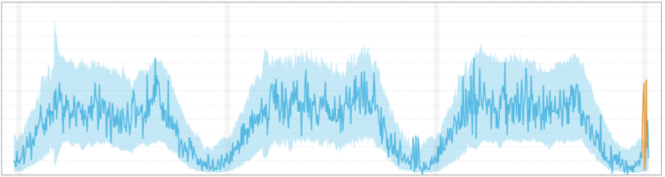
Contextual anomalies in time-series data

The above figure depicts a time-series data over a particular period of time. The plot was further smoothed by kernel density estimation to present the boundary of the trend. The values have not fallen outside the normal global bounds, but there are indeed abnormal points (highlighted in orange) when compared to the seasonality.

While dealing with contextual anomalies, one major aspect is to examine the anomalies in various contexts. Contexts are almost always very domain specific. This is why in most of the applications that deal with contextual anomalies, domain experts are consulted to formalize these contexts.

# Collective anomalies

In the following figure, the data points marked in green have collectively formed a region which substantially deviates from the rest of the data points.
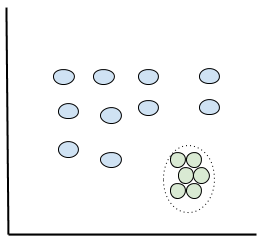
This an example of a collective anomaly. The main idea behind collective anomalies is that the data points included in forming the collection may not be anomalies when considered individually. Let’s take the example of a daily supply chain in a textile firm. Delayed shipments are very common in industries like this. But on a given day, if there are numerous shipment delays on orders then it might need further investigation. The delayed shipments do not contribute to this individually but a collective summary is taken into account when analyzing situations like this.

Collective anomalies are interesting because here you do not only to look at individual data points but also analyze their behavior in a collective fashion.

So far, we have introduced ourselves to the basics of anomalies, its types and other aspects like how anomalies are generated in specific domains. Let’s now try to relate to anomalies from a machine learning specific context. Let’s find out answers to general questions like - why anomalies are important to pay attention to while developing a machine learning model and so on.
# Introduction to Anomaly Detection in Python 
##### Detecting anomalies just by seeing

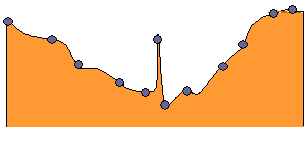

In [15]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shpw the plots in your Jupyter Notebook
%matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

Let's first create a dummy dataset for ourselves. The dataset will contain just two columns -

    Name of the employees of an organization
    Salaries of those employees (in USD) within a range of 1000 to 2500 (Monthly)

For generating the names (and make them look like the real ones) we will use a Python library called Faker (read the documentation here). For generating salaries, we will use the good old numpy. After generating these, we will merge them in a pandas DataFrame. We are going to generate records for 100 employees. Let's begin.

Note: Synthesizing dummy datasets for experimental purposes is indeed an essential skill.


In [19]:
from faker import Faker
fake = Faker()

# To ensure the results are reproducible
Faker.seed(4321)

names_list = []

fake = Faker()
for _ in range(100):
    names_list.append(fake.name())

# Verify if 100 names were generated
len(names_list)

100

In [20]:
# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

    # Verify if 100 salariy values were generated
len(salaries)

100

In [21]:
# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
salary_df.head()

,Person,Salary (in USD)
0,Jason Brown,1175
1,Jacob Stein,2220
2,Cody Brown,1537
3,Larry Morales,1502
4,Jessica Hendricks,1211


Let's now manually change the salary entries of two individuals. In reality, this can actually happen for a number of reasons such as the data recording software may have got corrupted at the time of recording the respective data.

In [22]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

In [23]:
# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


# Boxplots are great!

As mentioned in the earlier sections, the generation of anomalies within data directly depends on the generation of the data points itself. To simulate this, our approach is good enough to proceed. Let's now some basic statistics (like minimum value, maximum value, 1st quartile values etc.) in the form of a boxplot.

Boxplot, because we get the following information all in just one place that too visually -
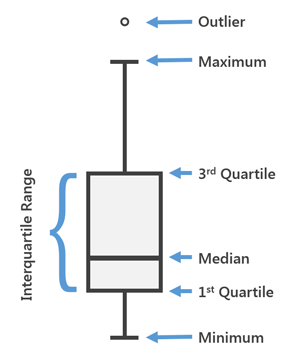

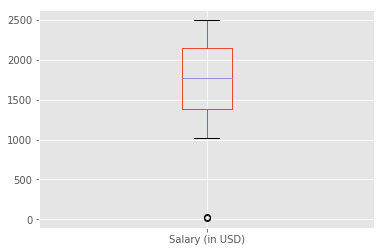

In [24]:
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

Notice the tiny circle point in the bottom. You instantly get a feeling of something wrong in there as it deviates hugely from the rest of the data. Now, you decide to look at the data from another visual perspective i.e. in terms of histograms.
**How about histograms?**

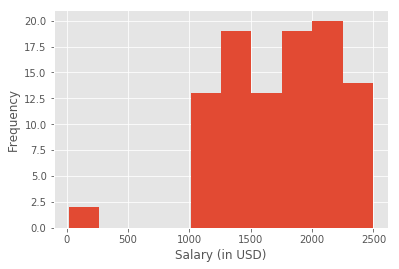

In [25]:
ax = salary_df['Salary (in USD)'].plot(kind='hist')
ax.set_xlabel('Salary (in USD)')
plt.show()

In the above histogram plot also, we can see there's one particular bin that is just not right as it deviates hugely from the rest of the data (phrase repeated intentionally to put emphasis on the deviation part). We can also infer that there are only two employees for which the salaries seem to be distorted (look at the y-axis).

So what might be an immediate way to confirm that the dataset contains anomalies? Let's take a look at the minimum and maximum values of the column Salary (in USD).


In [26]:
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


Look at the minimum value. From the accounts department of this hypothetical organization, you got to know that the minimum salary of an employee there is $1000. But you found out something different. Hence, its worth enough to conclude that this is indeed an anomaly. Let's now try to look at the data from a different perspective other than just simply plotting it.

Note: Although our dataset contains only one feature (i.e. Salary (in USD)) that contains anomalies but in reality, there can be a lot features which will have anomalies in them. Even there also, these little visualizations will help you a lot.



## Clustering based approach for anomaly detection

We have seen how clustering and anomaly detection are closely related but they serve different purposes. But clustering can be used for anomaly detection. In this approach, we start by grouping the similar kind of objects. Mathematically, this similarity is measured by distance measurement functions like Euclidean distance, Manhattan distance and so on. Euclidean distance is a very popular choice when choosing in between several distance measurement functions. Let's take a look at what Euclidean distance is all about.
An extremely short note on Euclidean distance

If there are n points on a two-dimensional space(refer the following figure) and their coordinates are denoted by(x_i, y_i), then the Euclidean distance between any two points((x1, y1) and(x2, y2)) on this space is given by:
$$ \sqrt{\left(x_{1}-x_{2}\right)^{2}+\left(y_{1}-y_{2}\right)^{2}} $$

We are going to use K-Means clustering which will help us cluster the data points (salary values in our case). The implementation that we are going to be using for KMeans uses Euclidean distance internally. Let's get started.



In [28]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

We will now import the kmeans module from scipy.cluster.vq. SciPy stands for Scientific Python and provides a variety of convenient utilities for performing scientific experiments. Follow its documentation here. We will then apply KMeans to salary_raw.

In [35]:
from scipy.cluster.vq import kmeans
import scipy
# Supply the data and the number of clusters to kmeans()
codebook, distortion = kmeans(salary_raw, 4)

In the above chunk of code, we fed the salary data points the kmeans(). We also specified the number of clusters to which we want to group the data points. cookbook is the centroids generated by kmeans() and distortion is the averagedEuclidean distance between the data points fed and the centroids generated by kmeans().

Let's assign the groups of the data points by calling th vq() method. It takes -

    The data points
    The centroid as generated by the clustering algorithm (kmeans() in our case)

It then returns the groups of the data points and the distance between the observation and its nearest group.


In [36]:
groups, cdist = scipy.cluster.vq.vq(salary_raw, codebook)

Let's now plot the groups we have got.

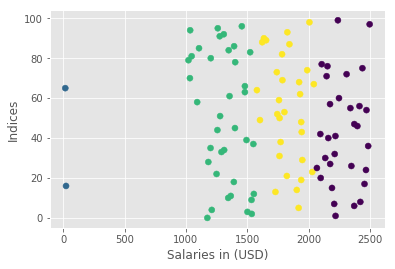

In [37]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()



Can you point to the anomalies? I bet you can!

The above method for anomaly detection is purely unsupervised in nature. If we had the class-labels of the data points, we could have easily converted this to a supervised learning problem, specifically a classification problem.

Shall we extend this? Well, why not?


# Anomaly detection as a classification problem

To be able to treat the task of anomaly detection as classification task, we need a labeled dataset. Let's give our existing dataset some labels.

We will first assign all the entries to the class of 0 and then we will manually edit the labels for those two anomalies. We will keep these class labels in a column named class. The label for the anomalies will be 1 (and for the normal entries the labels will be 0).


In [38]:
# First assign all the instances to 
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# Veirfy 
salary_df.loc[16]

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object

In [39]:
salary_df.head()

,Person,Salary (in USD),class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0




We now have a binary classification task. We are going to use proximity-based anomaly detection for solving this task. The basic idea here is that the proximity of an anomaly data point to its nearest neighboring data points largely deviates from the proximity of the data point to most of the other data points in the data set. Don't worry if this does not ring a bell now. Once, we visualize this, it will be clear.

We are going to use the k-NN classification method for this. Also, we are going to use a Python library called PyOD which is specifically developed for anomaly detection purposes.

I really encourage you take a look at the official documentation of PyOD here.


The column Person is not at all useful for the model as it is nothing but a kind of identifier. Let's prepare the training data accordingly.



In [41]:
# Importing KNN module from PyOD
from pyod.models.knn import KNN
# Segregate the salary values and the class labels 
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values
# Train kNN detector
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)



Let's discuss the two parameters we passed in to KNN() -

    contamination - the amount of anomalies in the data (in percentage) which for our case is 2/100 = 0.02
    n_neighbors - number of neighbors to consider for measuring the proximity

Let's now get the prediction labels on the training data and then get the outlier scores of the training data. The outlier scores of the training data. The higher the scores are, the more abnormal. This indicates the overall abnormality in the data. These handy features makes PyOD a great utility for anomaly detection related tasks.


In [42]:
# Get the prediction labels of the training data
y_train_pred = clf.labels_ 

# Outlier scores
y_train_scores = clf.decision_scores_



Let's now try to evaluate KNN() with respect to the training data.


In [43]:
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0




We see that the KNN() model was able perform exceptionally good on the training data. It provides three metrics and their scores -

    ROC
    Precision
    A confidence rank with which it gives the outlier scores.

Note: While detecting anomalies, we almost always consider ROC and Precision as it gives a much better idea about the model's performance. We have also seen its significance in the earlier sections.

We don't have any test data. But we can generate a sample salary value right?


In [44]:
# A salary of $37 (an anomaly right?)
X_test = np.array([[37.]])



Let's now test how if the model could detect this salary value as an anomaly or not.


In [45]:
# Check what the model predicts on the given test data point
clf.predict(X_test)

array([1])



We can see the model predicts just right. Let's also see how the model does on a normal data point.


In [46]:
# A salary of $1256
X_test_abnormal = np.array([[1256.]])

# Predict
clf.predict(X_test_abnormal)

array([0])

# A note about finding anomalies
# Introduction

Anomaly detection refers to the task of finding observations that do not conform to the normal, expected behaviour. These observations can be named as anomalies, outliers, novelty, exceptions, surprises in different application domains. The most popular terms that occur most often in literature are anomalies and outliers. Anomaly detection is an actual problem in various areas, such as:

    Intrusion detection
    Fraud detection
    Industrial damage detection
    Medical and public health
    Image processing
    Anomaly detection in text data
    Sensor networks and other domains
# What is anomaly

Unfortunately, there is no clear definition of the anomaly that’s why I’ve chosen the following one — anomalies are patterns in the data that do not conform to a well-defined notion of normal behaviour [1]. We can illustrate anomalies in a simple two-dimensional space (Figure 1).
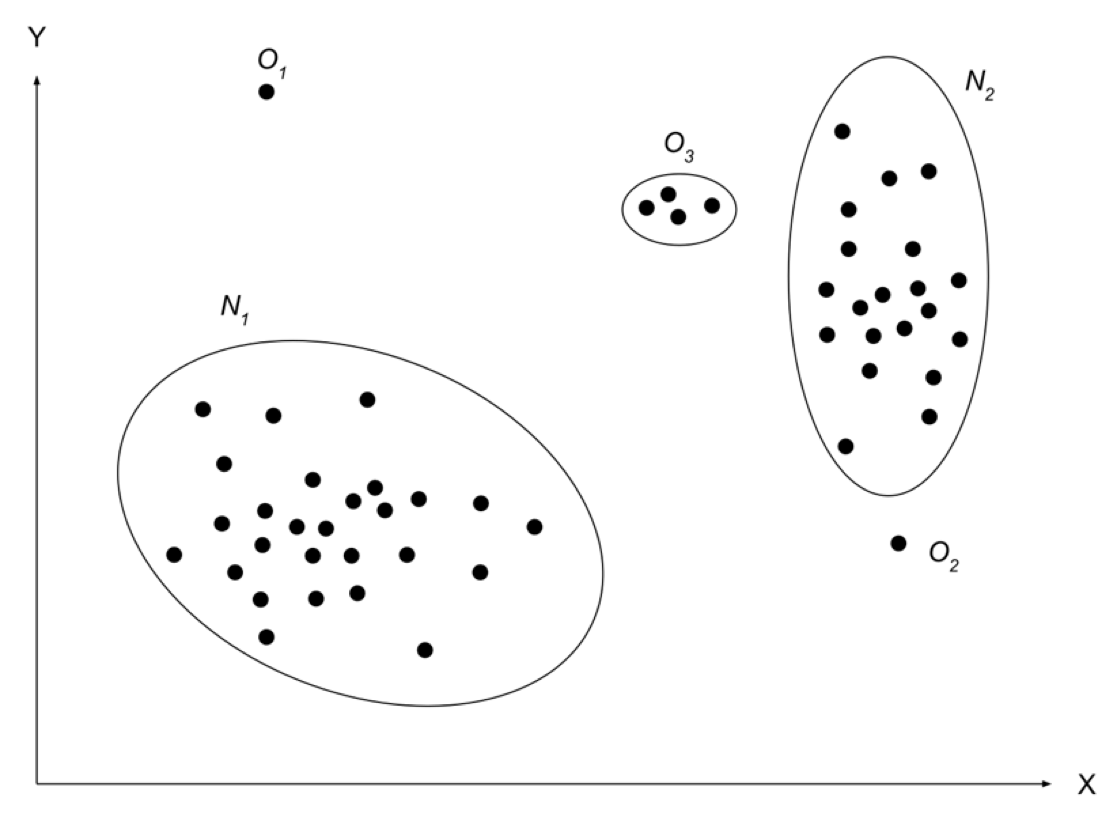
N₁ and N₂ are regions with normal data because the majority of observations are in these areas. Points that are far away from normal areas, like points O₁, O₂ and region O₃ are anomalies. Anomalies in the data can occur for different reasons. Malicious activity, credit-card fraud, intrusions, system breakdowns, etc. These anomalies are attractive to the data analyst. Therefore, anomaly detection is an important process and is considered as an advantage in various decision-making systems.
# Types of anomalies

Anomalies can be classified into the following three categories:

    Point Anomalies. If one object can be observed against other objects as anomaly, it is a point anomaly. This is the simplest anomaly category and a lot of researches include them. Taking into consideration example represented in Figure 1 points O₁ and O₂ are point anomalies
    Contextual Anomalies. If object is anomalous in some defined context. Only in this case it is contextual anomaly (also known as conditional anomaly [2]). In Figure 2 can be seen periodic context. In this case point O₁ is anomaly, because it differs from periodic context
    Collective Anomalies. If some linked objects can be observed against other objects as anomaly. Individual object can’t be anomalous in this case, only collection of objects.
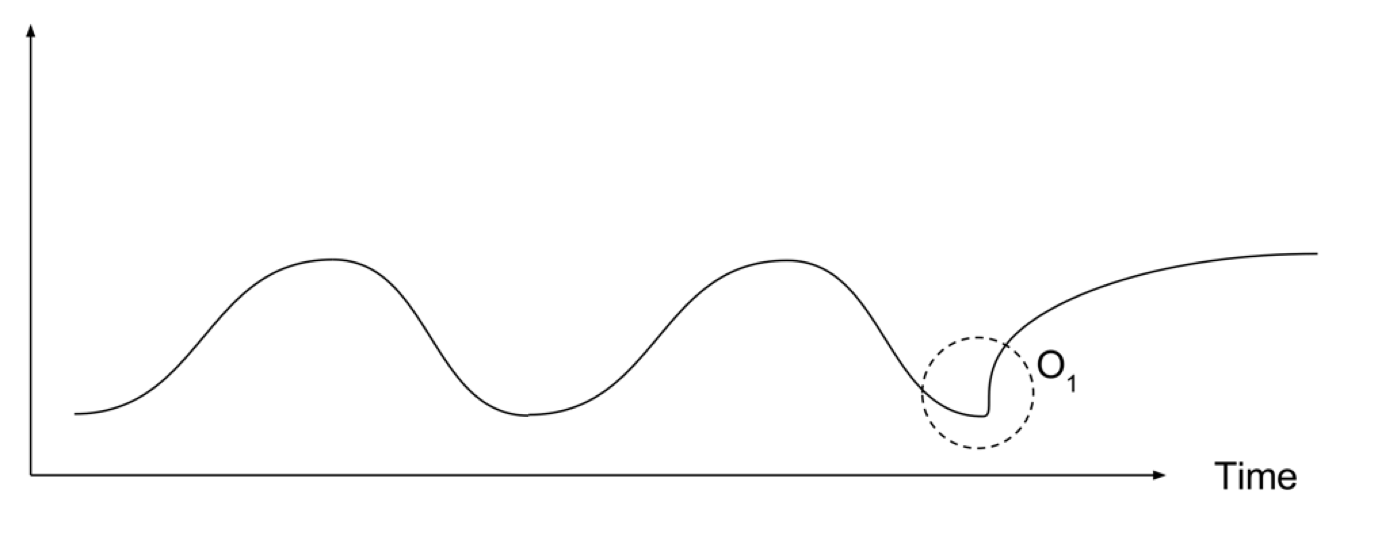

Figure 2. Contextual anomaly example

We need to understand, that these anomalies can be connected. Point anomaly could become contextual if we apply context to it. Or point anomalies could become collective ones, if we join multiple point anomalies together.

On the abstract level detection of the anomalies seems like a simple task. But this task can be very challenging. Here are some challenges bellow:

    Defining normal regions is very difficult. In many cases boundaries between anomalies and normal data are not precise. In this case, normal observations could be considered as anomalies and vice-versa
    If action is malicious, like fraud, it is considered as anomaly. Very often attackers try to adapt their actions to the normal behaviour. And again, task to identify anomalies in this case is not so simple
    What is considered normal today can be not normal in the future. Most of the business systems change in time under the influence of the various factors
    Approaches for anomaly detection in one field more often cannot be used in the other one. They will be ineffective in most cases
    Training and validation data availability for model training is a big problem

# Let’s play

Bellow I will give some dataset examples. Your goal is to scroll slowly (example by example) and try to determine anomalies by eye.

Figure 3. Little game

As you see, it is not trivial to determine anomalies in some cases “by eye”. Even if you will apply some statistical techniques, still it is not trivial. So, where to look and what to do?
# Anomaly detection approaches overview

Approaches that can be used to find anomalies fall into following categories [4]:

**Supervised Anomaly Detection**. A setup where the data is labelled in training and test data sets; when simple classifier can be trained, and applied. This case is like traditional pattern recognition with the exception of classes which are in most cases strongly unbalanced. Not all classification approaches suit for this task. For example, some types of decision trees cannot deal well with unbalanced data. Support Vector Machines (SVM) or Artificial Neural Networks (ANN) should perform better. However, this setup is not relevant, because we need to know all anomalies and label data correctly. For many cases anomalies are not known in advance or may occur as novelties during the test phase.
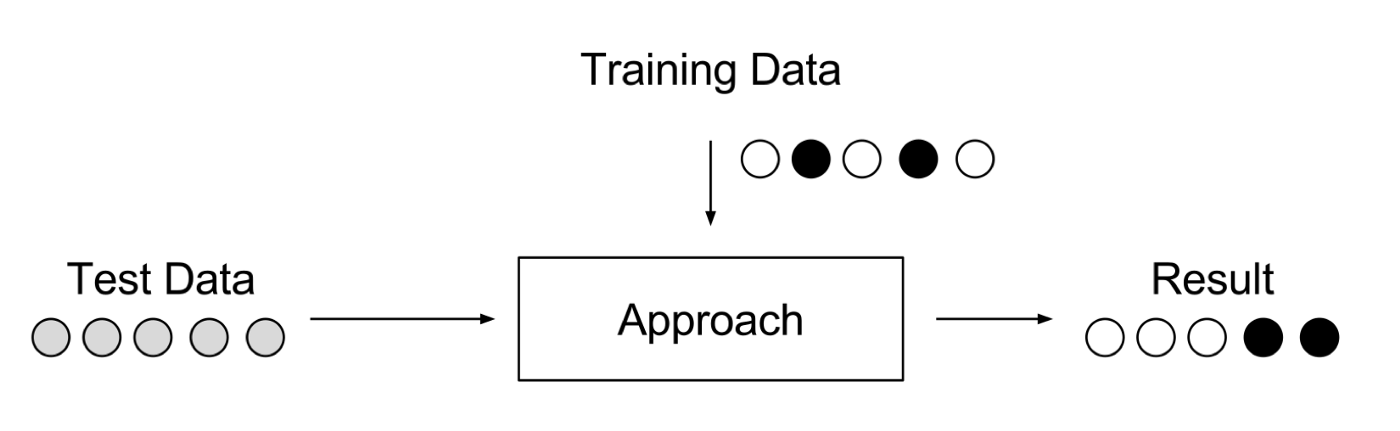
Figure 4. Supervised anomaly detection

**Semi-supervised Anomaly Detection**. In the beginning, when we do not have any knowledge, we gather it from training results. This setup also uses training and test datasets, where only training data consists of normal data without any anomalies. The idea is, that a model of the normal class is already taught and anomalies can be detected by deviating from learned model. This approach is also known as “one-class” classification. Well-known approaches are One-class SVMs and autoencoders. In general, any density estimation approach can be applied to model the probability density function of the normal classes, such as Gaussian Mixture approaches or Kernel Density Estimation.
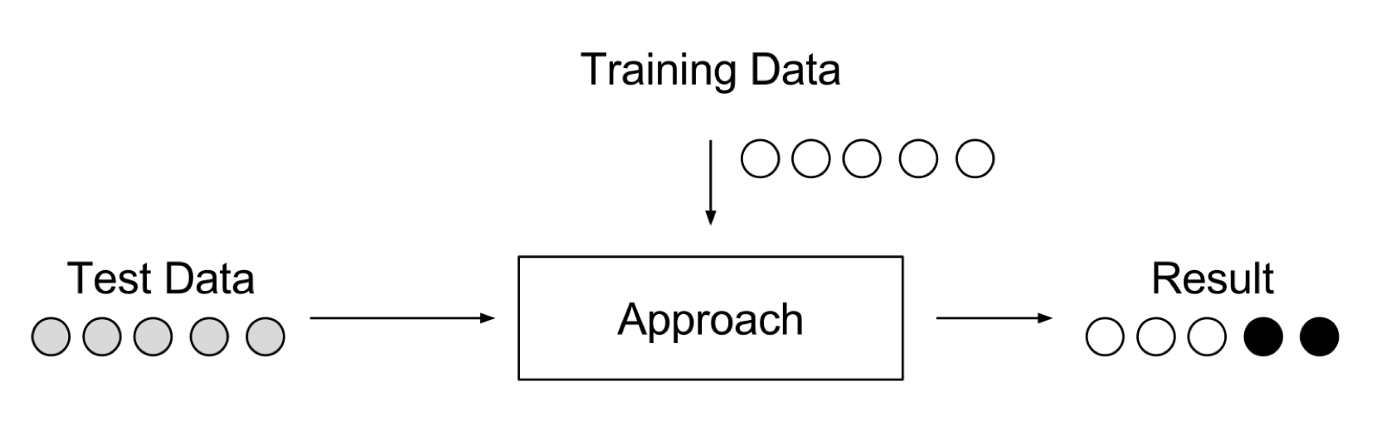
Figure 5. Semi-Supervised anomaly detection

**Unsupervised Anomaly Detection**. A setup, when we do not know, what is normal in the data and what is not. It is the most flexible configuration which does not require any labels. There is also no difference between a training and a test dataset. The concept is that an unsupervised anomaly detection approaches score the data solely based on natural features of the dataset. Typically, distances or densities are used to give an evaluation what is normal and what is an outlier. The visual representation can be found in Figure 6.
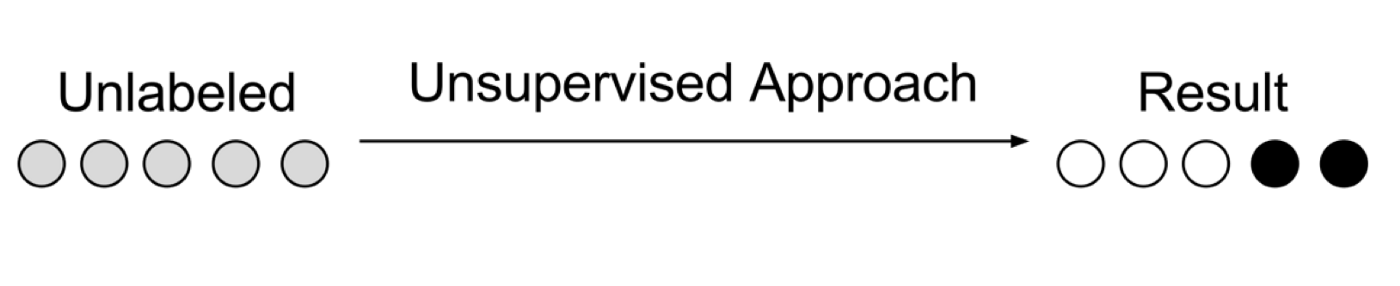
Figure 6. Unsupervised anomaly detection

Most approaches as output will give score or label. The difference between scoring and labelling is in flexibility. Using scoring techniques analyst can choose values which are more suitable for the problem area. After that, he can use the threshold value to select anomalies or just choose the top ones. Labelling is a classification. No approaches by now can be used in all domains with the same success without research about the domain and feature extraction. Most of the unsupervised anomaly detection approaches are shown in Figure 7.
Figure 7. Unsupervised anomaly detection approaches classification diagram
# Real life is dynamic

If the behaviour of observable objects in defined environment change in time, this environment can be considered as a dynamic environment.

A dynamic environment, such as a production process, a communication network, highway traffic, etc., may contain a huge amount of information, changing with time, which is a valuable resource for understanding the general behaviour of the environment, discovering the regularities and anomalies currently happening in the environment, controlling an evolution process, and intelligent modelling or managing the environment [3].

For example: an internet shop that is experiencing growth. Traffic and transactions volume change. What was normal before will not be now, and this shift only can be considered as an anomaly. This is one of the challenges identified earlier. Another example is a system that analyses customer behaviour. Customers may be classified initially. But customers also can move for some reason from one class to another in time. Systems evolve over time as the software is updated or as behaviour is changed. Firstly, for efficient detection of anomalies, systems for continuous learning are needed. Secondly, to detect anomalies in the early stages, one cannot wait for the metric to be clearly beyond the bounds. Early detection needs the ability to detect subtle changes in patterns that are not apparent. Besides, since the anomalies are by nature unexpected, an efficient detection system should be able to determine whether the anomalous events are new without relying on pre-programmed thresholds.

Detecting anomalies in the dynamic environment seems like a tough task. The biggest problem that can be faced is that in most companies there will be no data for learning. Most of the approaches to use in such case should be unsupervised.
# Possible solutions

Solutions that currently are progressive and give hope include Neural Networks (NN), some of them in combination with statistical approaches.

Popular NN used now for time-series is Long-Short Term Memory (LSTM) — it gained popularity in the Deep Learning field because of their possibility to remember long running dependencies.

Another one interesting kind of network which is new, not mentioned a lot, is a Hierarchical Temporal Memory (HTM) — it is a neural network that is based on researches in the neuro-science which also has ability to learn and remember long running dependencies. Will tell a little bit more about it.

# Hierarchical Temporal Memory (HTM)

HTM is an unsupervised to semi-supervised online machine learning method developed by Jeff Hawkins and Dileep George of Numenta, Inc. It is a technology that aims to capture the structural and algorithmic properties of the neocortex. HTM is a theory of the neocortex and has few similar brain structures. The neocortex comprises about 75% of volume of the human brain, and it is the core of most of what we think of as intelligence. HTM is a biological theory, meaning it is derived from neuroanatomy and neurophysiology and explains how the biological neocortex works. They say, that HTM theory is “biologically constrained” as opposite to “biologically inspired” — term used in machine learning.

The HTM learning method is designed to work with the dynamic environment as sensor and motor data. Sensor input can change depending on different obstacles as metrics from a server. Instead, the input data may change, because a sensor is moving the same as human being eyes are watching at the static picture.

HTM systems learn online. When there is any change in input data, the memory of HTM system is updated. There is a standard machine learning approach, like splitting data in test and training datasets, and learn network to achieve defined accuracy level. And the questions come out: “If there no labelling, how does it know, that it is working correctly? How can it correct its behaviour?”. At each point in time, HTM makes a prediction of what it expects will happen next. In other words, HTM builds a predictive model of the world. Then, the prediction is compared to what happened and this result is a basis for learning. As a classical machine learning methods, it tries to minimise the error of the predictions. HTM learns continuously. This is an essential quality for a biological organism to survive. HTM has been built around this idea, that intelligent systems need to learn continuously as biological organisms. There will be applications, where systems do not need to learn online, but these are not the norm, but exceptions. HTM is pretending to be a universal learning method for any task, which has temporal behaviour. More details can be found on their website, referring to the following source [4].
Invented new approach! How to prove that it works?

Okay, you invented new approach to solve this problem. How to prove, that your approach works and is better than others?

Many researchers, investigating unsupervised anomaly detection methods, encounter the problem — there is no defined framework to evaluate their performance. Many scientists only make theoretical assumptions. Currently, some attempts to create such framework appeared.

Markus Goldstein and Seiichi Uchida in their work [5] propose, how evaluation should be done for anomaly detection approaches. But their assessment methodology is oriented on methods that work with tabular data.

On the 14th International Conference on Machine Learning and Applications (IEEE ICMLA) 2015 Alexander Lavin and Subutai Ahmad proposed their methodology for real-time anomaly detection procedures evaluation — the Numenta Anomaly Benchmark (NAB)[6].

NAB

This is the first benchmark for anomaly detection procedures in time series. NAB is an open-source framework, that aims to evaluate real-time anomaly detection procedures through the controlled and repeatable environment. NAB data corpus consists of 58 real datasets, where anomaly windows are labelled. Each file consists of 2,000 to 22,000 timestamps with data aggregated in 5-minute intervals. It has an overall of 365,551 points. These datasets are synthetic and real-world:

    IT metrics
    social media chatter
    industrial machine sensors

Scoring mechanism has defined anomaly detection windows to measure early detection. It rewards algorithms that:

    detect all present anomalies
    detect them as soon as possible
    trigger few false-positives
    work with real-time data
    are automated across all datasets

It uses application profiles to gauge performance for different scenarios. All examples of datasets in “Let’s play” section are from this benchmark.

# 
https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

Many companies who’s main product is some kind of database will come up with this topic on the conferences and will show you how you can find anomalies with their tools. But problem is, that shown approach is good only for that specific dataset and use case. Keep that always in mind.

Remember that finding anomalies require appropriate definitions from the analyst. There are different types of anomalies. There are different methods to find specific types of anomalies. Always try to narrow your problem. And test your approach using available benchmarks or some datasets (if available) for your problem.

https://iwringer.wordpress.com/2015/11/17/anomaly-detection-concepts-and-techniques/

https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection/notebook

https://github.com/Vicam/Unsupervised_Anomaly_Detection/blob/master/Anomaly%20detection%2C%20different%20methods%20on%20a%20simple%20example.ipynb


https://github.com/Vicam/Unsupervised_Anomaly_Detection/blob/master/Anomaly%20detection%2C%20different%20methods%20on%20a%20simple%20example.ipynb

https://ngoix.github.io/thesis.pdf

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection

https://blog.floydhub.com/introduction-to-anomaly-detection-in-python

https://github.com/yzhao062/anomaly-detection-

https://github.com/falaybeg/SparkStreaming-Network-Anomaly-Detection

https://towardsdatascience.com/a-note-about-finding-anomalies-f9cedee38f0b

https://ieeexplore.ieee.org/document/8733806?denied=

https://github.com/falaybeg/SparkStreaming-Network-Anomaly-Detection/blob/master/anomaly_detection-classification.ipynb

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2
https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

 to see :
 https://github.com/SarielGil/Autoencoder_anomaly_detection/blob/master/Autoencoder_anomaly_detection.ipynb
 
 https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
 
 https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

In [ ]:
# 0 normalbehavior, 1 bad behavior 
dfp=pd.concat([df, df.shift().add_prefix('prev_')], 1)
dfp['behavior']= np.where(((dfp['DateStart']==date(2019,9,19))|((dfp['DateStart']==date(2019,9,18))&(dfp['hourStart']==10))),1,0)
